# Pymaceuticals Inc.
---

In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

Looking at the mean tumor volume (mm3) for the entire study, it appears that Capomulin and Ramicane result in a smaller tumor volume on average (~40 mm3) compared to the other treatments (~52-55 mm3)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>mean</th>
      <th>median</th>
      <th>var</th>
      <th>std</th>
      <th>sem</th>
    </tr>
    <tr>
      <th>Drug Regimen</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Capomulin</th>
      <td>40.675741</td>
      <td>41.557809</td>
      <td>24.947764</td>
      <td>4.994774</td>
      <td>0.329346</td>
    </tr>
    <tr>
      <th>Ceftamin</th>
      <td>52.591172</td>
      <td>51.776157</td>
      <td>39.290177</td>
      <td>6.268188</td>
      <td>0.469821</td>
    </tr>
    <tr>
      <th>Infubinol</th>
      <td>52.884795</td>
      <td>51.820584</td>
      <td>43.128684</td>
      <td>6.567243</td>
      <td>0.492236</td>
    </tr>
    <tr>
      <th>Ketapril</th>
      <td>55.235638</td>
      <td>53.698743</td>
      <td>68.553577</td>
      <td>8.279709</td>
      <td>0.603860</td>
    </tr>
    <tr>
      <th>Naftisol</th>
      <td>54.331565</td>
      <td>52.509285</td>
      <td>66.173479</td>
      <td>8.134708</td>
      <td>0.596466</td>
    </tr>
    <tr>
      <th>Placebo</th>
      <td>54.033581</td>
      <td>52.288934</td>
      <td>61.168083</td>
      <td>7.821003</td>
      <td>0.581331</td>
    </tr>
    <tr>
      <th>Propriva</th>
      <td>52.320930</td>
      <td>50.446266</td>
      <td>43.852013</td>
      <td>6.622085</td>
      <td>0.544332</td>
    </tr>
    <tr>
      <th>Ramicane</th>
      <td>40.216745</td>
      <td>40.673236</td>
      <td>23.486704</td>
      <td>4.846308</td>
      <td>0.320955</td>
    </tr>
    <tr>
      <th>Stelasyn</th>
      <td>54.233149</td>
      <td>52.431737</td>
      <td>59.450562</td>
      <td>7.710419</td>
      <td>0.573111</td>
    </tr>
    <tr>
      <th>Zoniferol</th>
      <td>53.236507</td>
      <td>51.818479</td>
      <td>48.533355</td>
      <td>6.966589</td>
      <td>0.516398</td>
    </tr>
  </tbody>
</table>
</div>

These averages were taken over the entire length of the experiemnt. A better way to examine the trends here would to look at the final tumor sizes at the end of the experiemnt, as shown in the boxplot below.

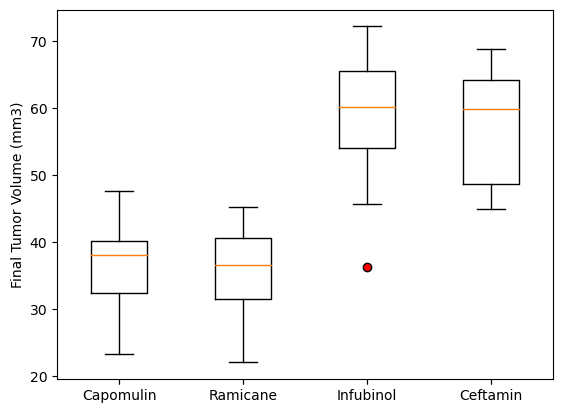

This shows that Capomulin and Ramicane result in a smaller final tumor volume on average comapred to the other treatments. There is a statistical outlier in the data for Infubinol.

There also may be a time lag in the action of the drug tratment. Below is an example of measuring the tumor volume of a single mouse receving one drug treatment.

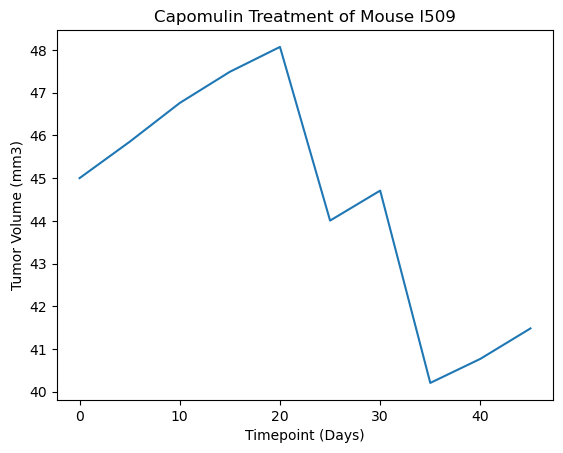

Even though the drug is administered on day 0, the tumor volume continues to increase until day 20, after which the tumor volume starts to decrease.

The graph below shows the weight of the mice versus the average tumor volume for a single treatment (Capomulin).

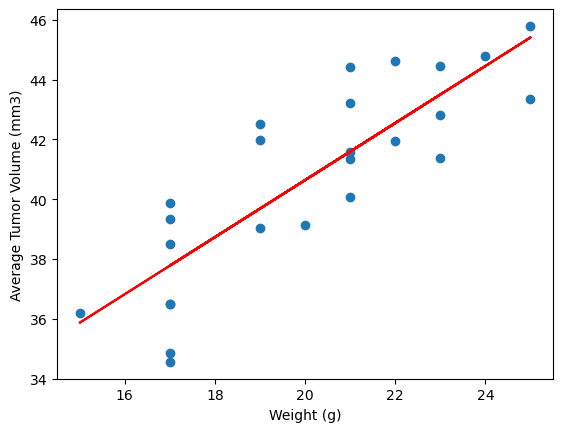

This shows a moderate to strong (R2~0.71) positive correlation between the weight of the mouse and the average tumor volume. 

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df=pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [49]:
# Checking the number of mice. 
data_df['Mouse ID'].describe()

count     1893
unique     249
top       g989
freq        13
Name: Mouse ID, dtype: object

In [50]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_check=data_df[data_df[["Mouse ID", "Timepoint"]].duplicated()==True]
print(duplicate_check[['Mouse ID', 'Timepoint']])


    Mouse ID  Timepoint
861     g989          0
863     g989          5
865     g989         10
867     g989         15
869     g989         20


In [51]:
# Optional: Get all the data for the duplicate mouse ID. 
#print(data_df['Mouse ID']=='g989')
duplicate_data=data_df.loc[data_df["Mouse ID"]=='g989']
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=data_df.loc[data_df["Mouse ID"]!='g989']

In [53]:
# Checking the number of mice in the clean DataFrame. 
clean_data['Mouse ID'].describe()

count     1880
unique     248
top       b128
freq        10
Name: Mouse ID, dtype: object

## Summary Statistics

In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_summary=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Assemble the resulting series into a single summary DataFrame.
drug_summary_df=pd.DataFrame(drug_summary)
drug_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [55]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

drug_summary_df=pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns = {'mean':'Mean Tumor Volume',
                                                                                                                                                      'median':'Median Tumor Volume',
                                                                                                                                                      'var':'Tumor Volume Variance',
                                                                                                                                                      'std':'Tumor Volume Std Dev',
                                                                                                                                                      'sem':'Tumor Volume Std Err'}))

drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

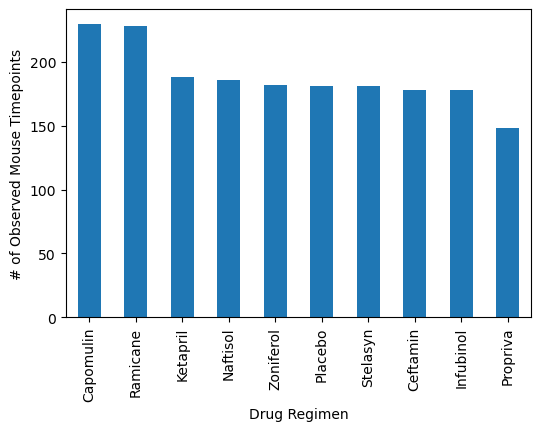

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
observations_drug = clean_data.groupby('Drug Regimen')
observations_drug_count = observations_drug['Drug Regimen'].value_counts().sort_values(ascending=False)
observations_drug_chart = observations_drug_count.plot(kind='bar', figsize=(6,4), ylabel='# of Observed Mouse Timepoints')

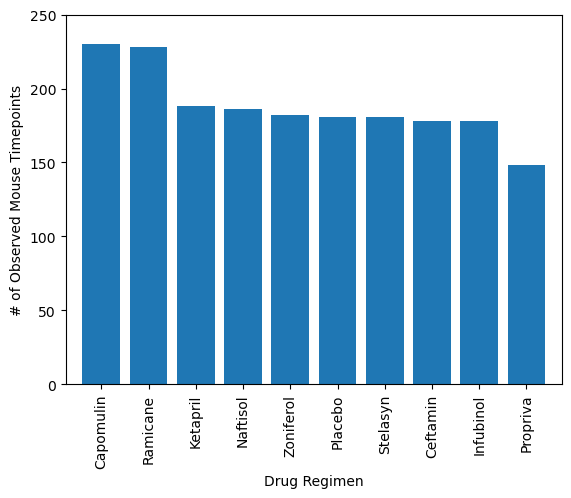

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x = observations_drug_count.index
y = observations_drug_count
x_axis = np.arange(len(y))

plt.bar(x_axis, y, color='tab:blue', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y)+20)
plt.xticks(rotation=90)

plt.show()

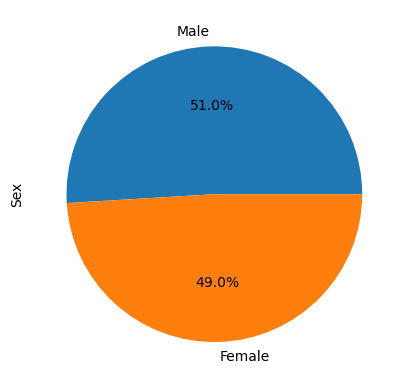

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_chart_data=pd.Series(clean_data['Sex']).value_counts()
pie_labels=['Male', 'Female']

gender_chart_data.plot(kind='pie', labels=pie_labels, autopct="%1.1f%%", ylabel='Sex')
plt.show()

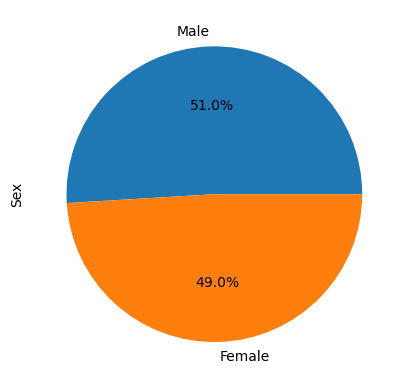

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts=pd.Series(clean_data['Sex']).value_counts()
gender=gender_chart_data.index

plt.pie(counts, labels=gender, autopct="%1.1f%%")
plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_treatments=clean_data.loc[(clean_data["Drug Regimen"]=='Capomulin') | 
                                (clean_data["Drug Regimen"]=='Ramicane') |
                                (clean_data["Drug Regimen"]=='Infubinol') |
                                (clean_data["Drug Regimen"]=='Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint=pd.DataFrame(four_treatments.groupby('Mouse ID')['Timepoint'].last())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tumor_volume_timepoint=pd.merge(four_treatments, last_timepoint, on=['Mouse ID', 'Timepoint'])

tumor_volume_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
95,t565,45,34.455298,0,Capomulin,Female,20,17
96,i557,45,47.685963,1,Capomulin,Female,1,24
97,m957,45,33.329098,1,Capomulin,Female,3,19
98,f966,20,30.485985,0,Capomulin,Male,16,17


In [61]:
#Put treatments into a list for for loop (and later for plot labels)

treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


# Locate the rows which contain mice on each drug and get the tumor volumes

capomulin_boxplot_data=tumor_volume_timepoint.loc[tumor_volume_timepoint["Drug Regimen"]=='Capomulin']['Tumor Volume (mm3)'].tolist()
ramicane_boxplot_data=tumor_volume_timepoint.loc[tumor_volume_timepoint["Drug Regimen"]=='Ramicane']['Tumor Volume (mm3)'].tolist()
infubinol_boxplot_data=tumor_volume_timepoint.loc[tumor_volume_timepoint["Drug Regimen"]=='Infubinol']['Tumor Volume (mm3)'].tolist()
ceftamin_boxplot_data=tumor_volume_timepoint.loc[tumor_volume_timepoint["Drug Regimen"]=='Ceftamin']['Tumor Volume (mm3)'].tolist()

boxplot_data=[capomulin_boxplot_data, ramicane_boxplot_data, infubinol_boxplot_data, ceftamin_boxplot_data]
    
# Determine outliers using upper and lower bounds

for index in range(len(treatments)):
    
    outlier_data=pd.Series(boxplot_data[index])
    quartiles = outlier_data.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers=outlier_data.loc[(outlier_data<lower_bound)|(outlier_data>upper_bound)] 
    print(f"{treatments[index]} potential outliers: {outliers}")

Capomulin potential outliers: Series([], dtype: float64)
Ramicane potential outliers: Series([], dtype: float64)
Infubinol potential outliers: 0    36.321346
dtype: float64
Ceftamin potential outliers: Series([], dtype: float64)


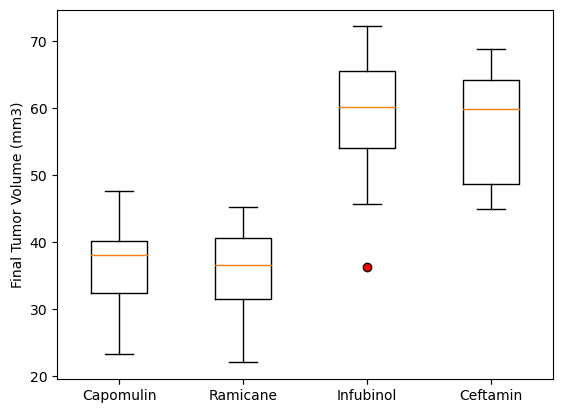

In [62]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.boxplot(boxplot_data, labels=treatments, flierprops={'markerfacecolor': 'red'})
plt.show()

## Line and Scatter Plots

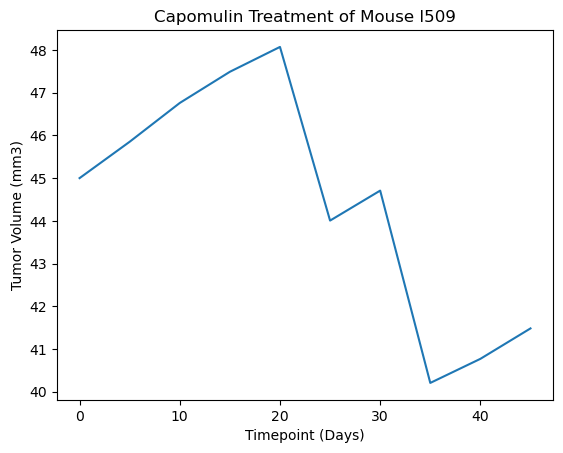

In [63]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509=clean_data.loc[clean_data['Mouse ID']=="l509",:]
mouse_l509_graph_data=mouse_l509[['Timepoint','Tumor Volume (mm3)']].set_index('Timepoint')

mouse_l509_graph_data.plot(legend=False, xlabel='Timepoint (Days)', ylabel='Tumor Volume (mm3)', title='Capomulin Treatment of Mouse l509')
plt.show()

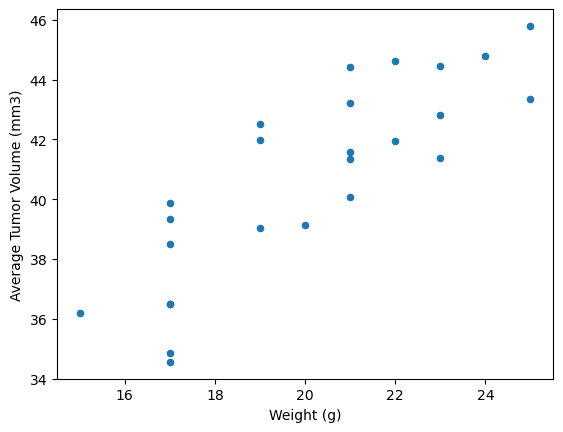

In [64]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data=clean_data.loc[clean_data['Drug Regimen']=='Capomulin',:]
grouped_data=capomulin_data.groupby('Mouse ID')[['Weight (g)','Tumor Volume (mm3)']].mean()
grouped_data.plot(kind="scatter", x='Weight (g)', y='Tumor Volume (mm3)', ylabel='Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.71


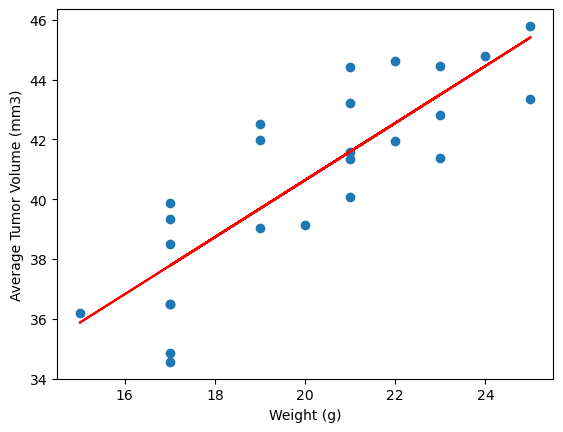

In [65]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data=clean_data.loc[clean_data['Drug Regimen']=='Capomulin',:]
grouped_data=capomulin_data.groupby('Mouse ID')[['Weight (g)','Tumor Volume (mm3)']].mean()

x_values=grouped_data['Weight (g)']
y_values=grouped_data['Tumor Volume (mm3)']

plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue**2,2)}")
plt.show()
